In [44]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

try:
    import pandas_datareader.data as web
except ImportError:
    print("You need to install the pandas_datareader. Run pip install pandas_datareader.")

from sklearn.linear_model import LinearRegression

In [45]:
df = web.DataReader("AAPL","stooq",start="2018-01-04",end="2022-01-04")["Close"]
df

Date
2022-01-04    178.6650
2022-01-03    180.9580
2021-12-31    176.5410
2021-12-30    177.1690
2021-12-29    178.3460
                ...   
2018-01-10     41.4317
2018-01-09     41.4416
2018-01-08     41.4575
2018-01-05     41.6001
2018-01-04     41.1366
Name: Close, Length: 1008, dtype: float64

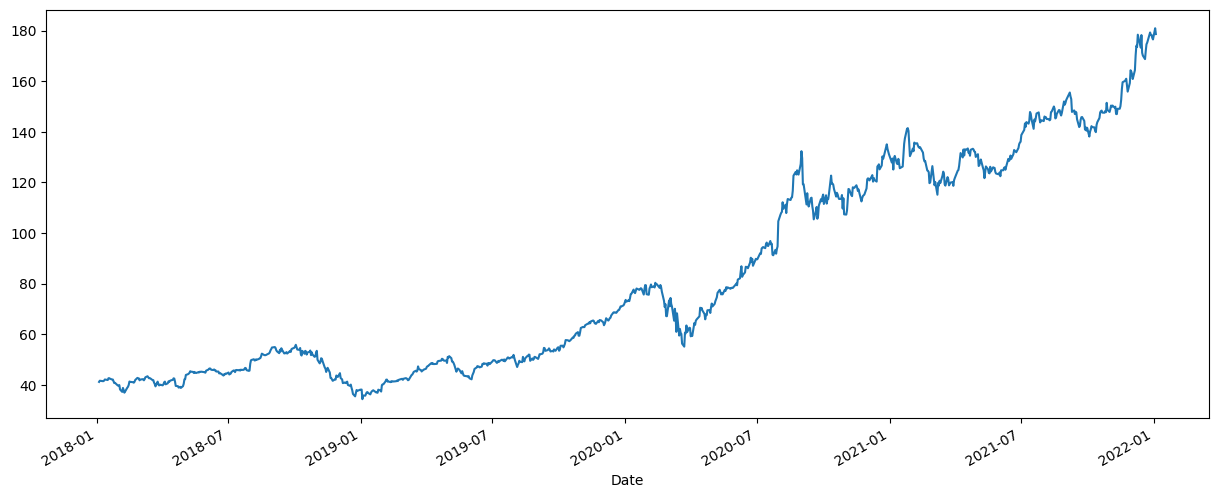

In [46]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()


In [47]:
df_melted = pd.DataFrame({"Close": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "AAPL"

df_melted.head()

,Close,date,Symbols
Date,,,
2022-01-04,178.665,2022-01-04,AAPL
2022-01-03,180.958,2022-01-03,AAPL
2021-12-31,176.541,2021-12-31,AAPL
2021-12-30,177.169,2021-12-30,AAPL
2021-12-29,178.346,2021-12-29,AAPL


In [48]:
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)
df_rolled

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\tsfresh\utilities\dataframe_functions.py:521: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  "Your time stamps are not uniformly sampled, which makes rolling "
Rolling: 100%|██████████| 39/39 [00:03<00:00, 12.88it/s]


,Close,date,Symbols,id
0,41.1366,2018-01-04,AAPL,"(AAPL, 2018-01-11 00:00:00)"
1,41.6001,2018-01-05,AAPL,"(AAPL, 2018-01-11 00:00:00)"
2,41.4575,2018-01-08,AAPL,"(AAPL, 2018-01-11 00:00:00)"
3,41.4416,2018-01-09,AAPL,"(AAPL, 2018-01-11 00:00:00)"
4,41.4317,2018-01-10,AAPL,"(AAPL, 2018-01-11 00:00:00)"
...,...,...,...,...
20938,178.3460,2021-12-29,AAPL,"(AAPL, 2022-01-04 00:00:00)"
20939,177.1690,2021-12-30,AAPL,"(AAPL, 2022-01-04 00:00:00)"
20940,176.5410,2021-12-31,AAPL,"(AAPL, 2022-01-04 00:00:00)"
20941,180.9580,2022-01-03,AAPL,"(AAPL, 2022-01-04 00:00:00)"


In [49]:
df_rolled.nunique()

Close       978
date       1008
Symbols       1
id         1003
dtype: int64

In [50]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

In [51]:
X = extract_features(df_rolled.drop("Symbols", axis=1), 
                     column_id="id", column_sort="date", column_value="Close", 
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]


In [52]:
X

Close__variance_larger_than_standard_deviation  \
AAPL 2018-01-11                                             0.0   
     2018-01-12                                             0.0   
     2018-01-16                                             0.0   
     2018-01-17                                             0.0   
     2018-01-18                                             0.0   
...                                                         ...   
     2021-12-29                                             1.0   
     2021-12-30                                             1.0   
     2021-12-31                                             1.0   
     2022-01-03                                             1.0   
     2022-01-04                                             1.0   

                 Close__has_duplicate_max  Close__has_duplicate_min  \
AAPL 2018-01-11                       0.0                       0.0   
     2018-01-12                       0.0                       0.0   
     2018-01-16                       0.0                       0.0   
     2018-01-17                       0.0                       0.0   
     2018-01-18                       0.0                       0.0   
...                                   ...                       ...   
     2021-12-29                       0.0                       0.0   
     2021-12-30                       0.0                       0.0   
     2021-12-31                       0.0                       0.0   
     2022-01-03                       0.0                       0.0   
     2022-01-04                       0.0                       0.0   

                 Close__has_duplicate  Close__sum_values  Close__abs_energy  \
AAPL 2018-01-11                   0.0           248.7374       10311.885027   
     2018-01-12                   0.0           290.8300       12083.672002   
     2018-01-16                   0.0           332.7162       13838.125752   
     2018-01-17                   0.0           375.2934       15650.943712   
     2018-01-18                   0.0           417.9094       17467.067168   
...                               ...                ...                ...   
     2021-12-29                   0.0          3606.7570      620115.915231   
     2021-12-30                   0.0          3619.5780      624494.504688   
     2021-12-31                   0.0          3632.2990      628824.236969   
     2022-01-03                   0.0          3650.4440      635061.961764   
     2022-01-04                   0.0          3668.2100      641094.655788   

                 Close__mean_abs_change  Close__mean_change  \
AAPL 2018-01-11                0.174020            0.106660   
     2018-01-12                0.215467            0.159333   
     2018-01-16                0.214171            0.107086   
     2018-01-17                0.273775            0.180075   
     2018-01-18                0.247667            0.164378   
...                                 ...                 ...   
     2021-12-29                2.660000            0.699900   
     2021-12-30                2.692450            0.667450   
     2021-12-31                2.673500            0.686400   
     2022-01-03                2.798650            1.002950   
     2022-01-04                2.739850            0.714850   

                 Close__mean_second_derivative_central  Close__median  ...  \
AAPL 2018-01-11                              -0.028162       41.44955  ...   
     2018-01-12                              -0.004080       41.45750  ...   
     2018-01-16                              -0.055825       41.52880  ...   
     2018-01-17                               0.016250       41.60010  ...   
     2018-01-18                              -0.026544       41.63500  ...   
...                                                ...            ...  ...   
     2021-12-29                               0.016263      173.32100  ...   
     2021-12-30              

In [53]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2018-01-11,0.0,0.0,0.0,0.0,248.7374,10311.885027,0.174020,0.106660,-0.028162,41.44955,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,68.710414
2018-01-12,0.0,0.0,0.0,0.0,290.8300,12083.672002,0.215467,0.159333,-0.004080,41.45750,...,1.039721,1.039721,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,68.710414
2018-01-16,0.0,0.0,0.0,0.0,332.7162,13838.125752,0.214171,0.107086,-0.055825,41.52880,...,0.950271,1.332179,1.332179,1.329661,1.609438,1.386294,1.098612,0.693147,0.0,41.654229
2018-01-17,0.0,0.0,0.0,0.0,375.2934,15650.943712,0.273775,0.180075,0.016250,41.60010,...,0.950271,0.950271,1.609438,1.351784,1.791759,1.609438,1.386294,1.098612,0.0,41.817871
2018-01-18,0.0,0.0,0.0,0.0,417.9094,17467.067168,0.247667,0.164378,-0.026544,41.63500,...,0.450561,1.011404,1.791759,1.386294,1.747868,1.791759,1.609438,1.386294,0.0,41.985643


In [54]:
y = df_melted.set_index("date").sort_index().Close.shift(-1)

In [55]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [56]:
X[:"2018"]

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2018-01-11,0.0,0.0,0.0,0.0,248.7374,10311.885027,0.174020,0.106660,-0.028162,41.44955,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,68.710414
2018-01-12,0.0,0.0,0.0,0.0,290.8300,12083.672002,0.215467,0.159333,-0.004080,41.45750,...,1.039721,1.039721,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,68.710414
2018-01-16,0.0,0.0,0.0,0.0,332.7162,13838.125752,0.214171,0.107086,-0.055825,41.52880,...,0.950271,1.332179,1.332179,1.329661,1.609438,1.386294,1.098612,0.693147,0.0,41.654229
2018-01-17,0.0,0.0,0.0,0.0,375.2934,15650.943712,0.273775,0.180075,0.016250,41.60010,...,0.950271,0.950271,1.609438,1.351784,1.791759,1.609438,1.386294,1.098612,0.0,41.817871
2018-01-18,0.0,0.0,0.0,0.0,417.9094,17467.067168,0.247667,0.164378,-0.026544,41.63500,...,0.450561,1.011404,1.791759,1.386294,1.747868,1.791759,1.609438,1.386294,0.0,41.985643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.0,0.0,0.0,0.0,857.5464,35125.898158,0.809535,-0.306965,-0.039382,40.92320,...,0.304636,0.600166,2.145842,1.634167,2.447151,2.670120,2.685945,2.708050,0.0,43.084443
2018-12-26,1.0,0.0,0.0,0.0,853.8995,34835.993313,0.906190,-0.210310,0.067871,40.80350,...,0.304636,0.600166,1.594167,1.616282,2.370135,2.670120,2.685945,2.708050,0.0,43.084443
2018-12-27,1.0,0.0,0.0,0.0,849.4461,34480.587054,0.914215,-0.218335,-0.049061,40.69090,...,0.304636,0.304636,1.846220,1.634167,2.370135,2.670120,2.685945,2.708050,0.0,43.072057


In [57]:
X_train = X[:"2020"]
X_test = X["2021":]

y_train = y[:"2020"]
y_test = y["2021":]

In [58]:
X_train_selected = select_features(X_train, y_train)

In [59]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

In [60]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

<AxesSubplot:xlabel='last_date'>

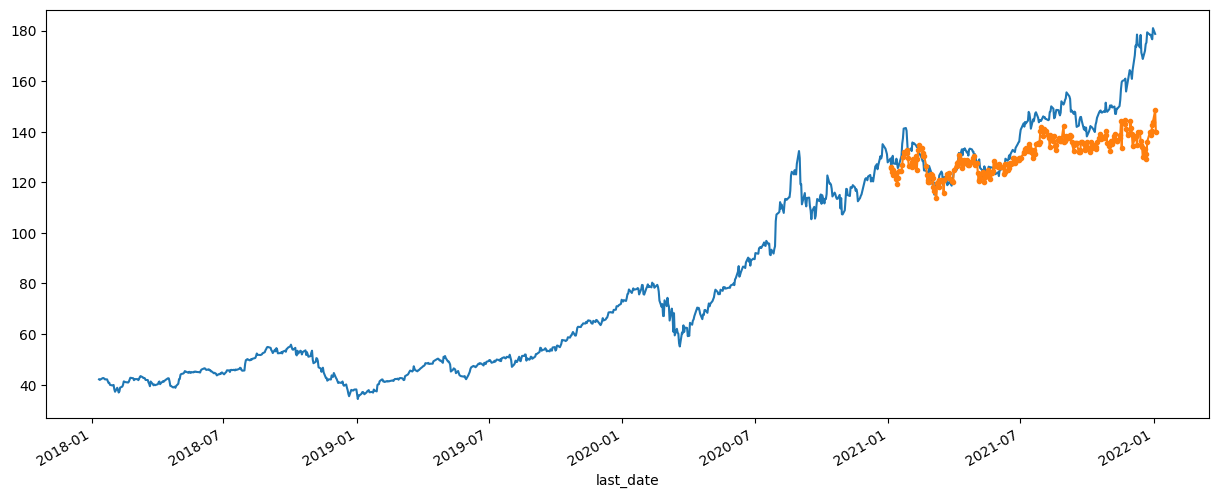

In [61]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")